## Titanic Disaster (Kaggle 문제 풀어보기)

### 1. Data Check

In [0]:
!pip install tensorflow
!pip install pandas
!pip install numpy
import tensorflow as tf
import pandas as pd
import numpy as np

In [0]:
from google.colab import files
uploaded = files.upload()

In [0]:
from google.colab import files
uploaded = files.upload()

In [0]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [172]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [173]:
train.shape

(891, 12)

In [174]:
test.shape

(418, 11)

In [175]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [176]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [0]:
def bar_chart(feature, stack_val=True):
  survived = train[train['Survived']==1][feature].value_counts()
  dead = train[train['Survived']==0][feature].value_counts()
  df=pd.DataFrame([survived,dead])
  df.index=['Survived','Dead']
  df.plot(kind='bar',stacked=stack_val, figsize=(10,5))
  
def facetGrid(feature):
  facet = sns.FacetGrid(train, hue='Survived', aspect=4)
  facet.map(sns.kdeplot,feature, shade=True) # kdeplot으로 feature를 기준으로 플롯팅하겠다.
  facet.set(xlim=(0,train[feature].max())) #x축 범위지정
  facet.add_legend() #범례표시

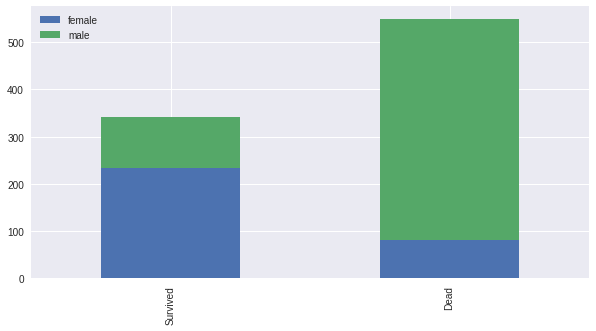

In [179]:
bar_chart('Sex')

여자들이 더 많이 살았다는 것을 알 수 있음.

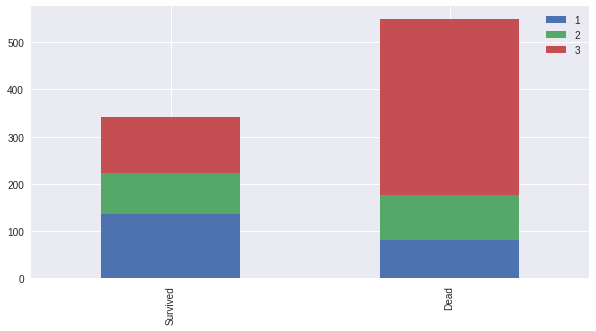

In [180]:
bar_chart('Pclass')

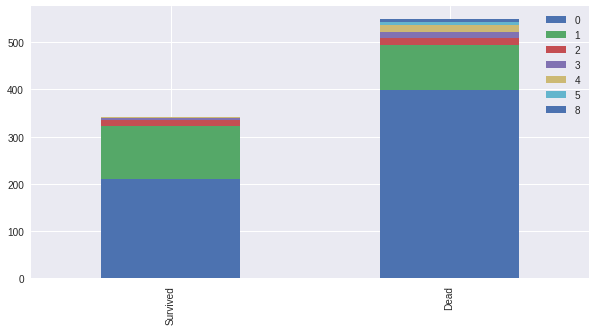

In [181]:
bar_chart('SibSp')

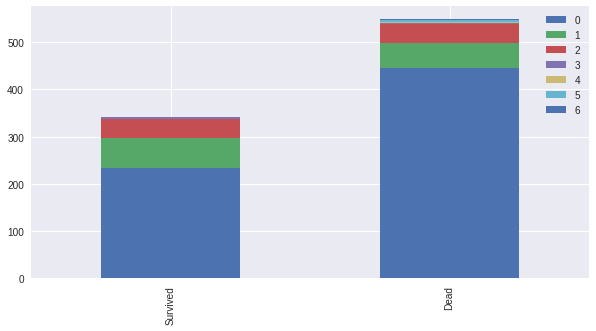

In [182]:
bar_chart('Parch')

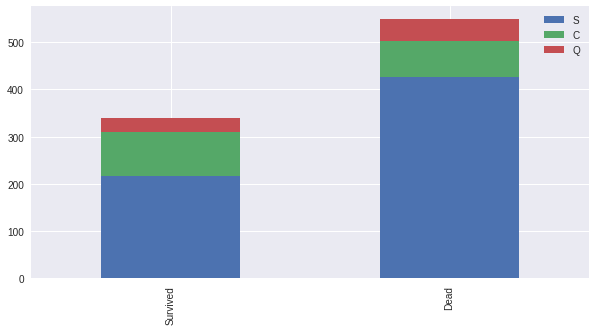

In [183]:
bar_chart('Embarked')

# 2. Feature Engineering

### 2.1 Name
Mr: 0, Miss: 1, Mrs: 2, etc:3

In [0]:
#train과 test를 리스트로 묶어서 처리함
train_test_data = [train, test] # combining train and test dataset
#dataset에 Title항목을 만들고 여기에 정규표현식으로 Mr. Miss. Mrs.만 추출해서 넣음
for dataset in train_test_data:
    #print(dataset)
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [185]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Jonkheer      1
Mme           1
Capt          1
Sir           1
Countess      1
Ms            1
Don           1
Lady          1
Name: Title, dtype: int64

In [186]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [0]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [188]:
#drop는 한번만 실행되도록. 드랍시켜버리면 다음부터는 드랍시킬게 없기때문에
train.drop('Name',axis=1, inplace=True)
test.drop('Name',axis=1, inplace=True)
train.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


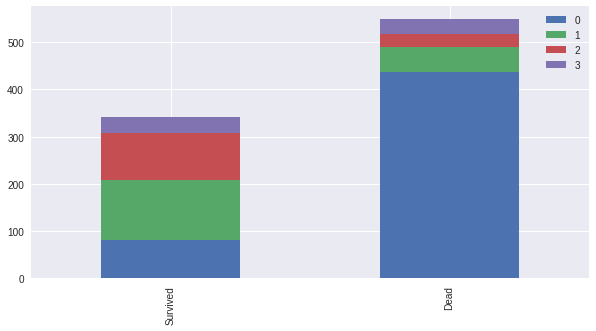

In [189]:
bar_chart('Title')

### 2.2 Sex
male:0, female:1

In [190]:
sex_mapping={"male":0, "female":1}
for dataset in train_test_data:
  dataset['Sex'] = dataset['Sex'].map(sex_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


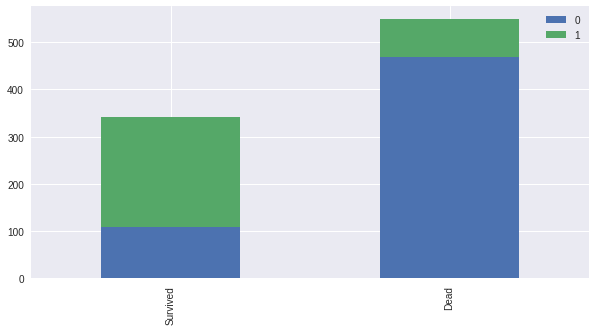

In [191]:
bar_chart('Sex')

### 2.3 Age
missing age issue

In [0]:
#fill missing age with median age for each title(Mr, Mrs, Miss, Others)
#Age열이 비어있는 레코드는 Title로 그룹을 짓고 해당 그룹의 Age 평균으로 채워라
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)

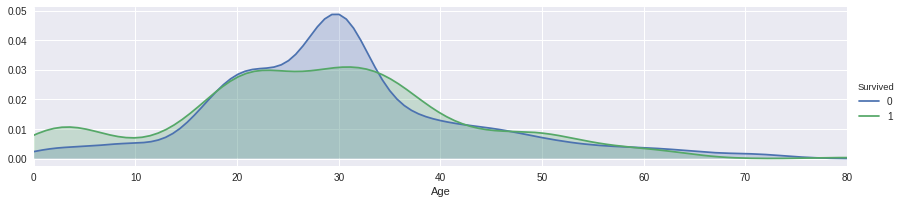

In [193]:
#그래프로 살펴보기
facet = sns.FacetGrid(train, hue="Survived",aspect=4) 
facet.map(sns.kdeplot,'Age',shade= True) 
facet.set(xlim=(0, train['Age'].max())) #x축 범위지정
facet.add_legend()

(0, 20)

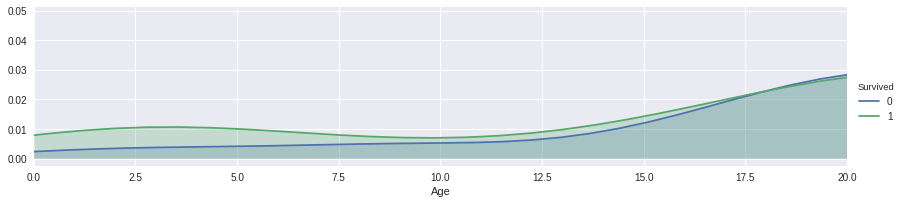

In [194]:
facetGrid('Age')
plt.xlim(0,20)

(20, 30)

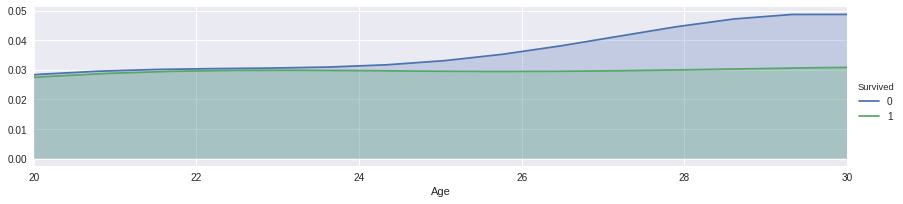

In [195]:
facetGrid('Age')
plt.xlim(20,30)

(30, 40)

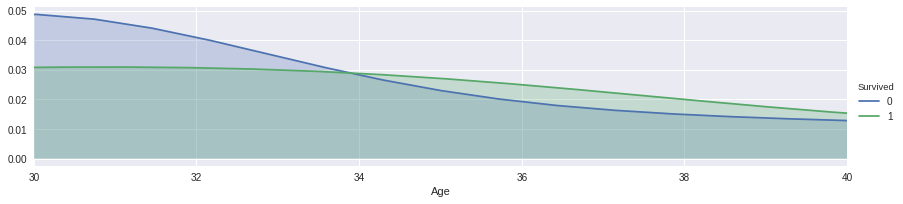

In [196]:
facetGrid('Age')
plt.xlim(30,40)

(40, 60)

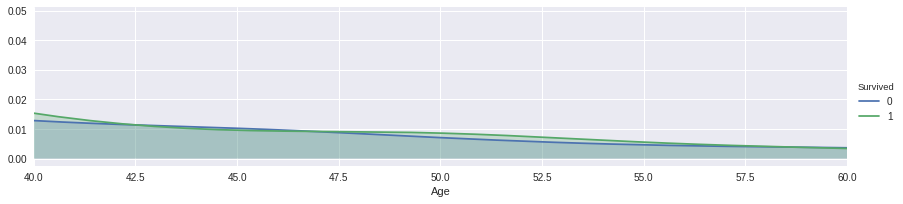

In [197]:
facetGrid('Age')
plt.xlim(40,60)

(60, 80.0)

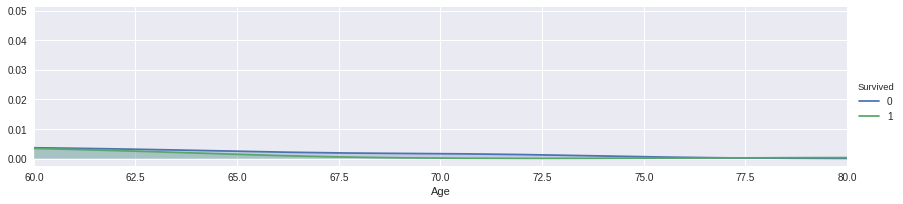

In [198]:
facetGrid('Age')
plt.xlim(60)

In [199]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


####2.4.1 Binning
Binning/Converting Numerical Age to Categorical Variable

feature vector map:

child: 0

young: 1

adult: 2

mid-age: 3

senior: 4

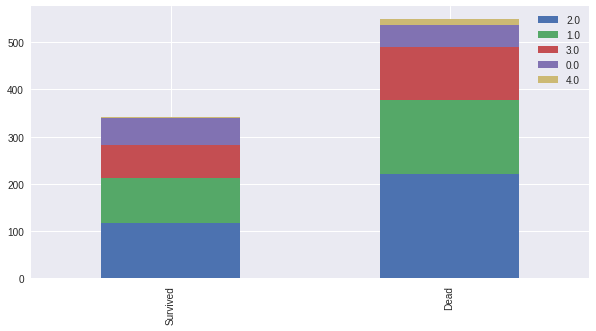

In [200]:
for dataset in train_test_data:
  #loc는 pandas dataframe의 행 또는 열 단위로 접근할 때 사용
  dataset.loc[dataset['Age']<=16, 'Age']=0
  dataset.loc[(dataset['Age']>16) & (dataset['Age']<=26), 'Age'] = 1
  dataset.loc[(dataset['Age']>26) & (dataset['Age']<=36), 'Age'] = 2
  dataset.loc[(dataset['Age']>36) & (dataset['Age']<=62), 'Age'] = 3
  dataset.loc[dataset['Age']>62, 'Age'] = 4
  
#dataset.head(30)
bar_chart('Age')

###2.4 Embarked

####2.5.1 Filling missing values

'\nkind : str\n\n‘line’ : line plot (default)\n‘bar’ : vertical bar plot\n‘barh’ : horizontal bar plot\n‘hist’ : histogram\n‘box’ : boxplot\n‘kde’ : Kernel Density Estimation plot\n‘density’ : same as ‘kde’\n‘area’ : area plot\n‘pie’ : pie plot\n‘scatter’ : scatter plot\n‘hexbin’ : hexbin plot\n'

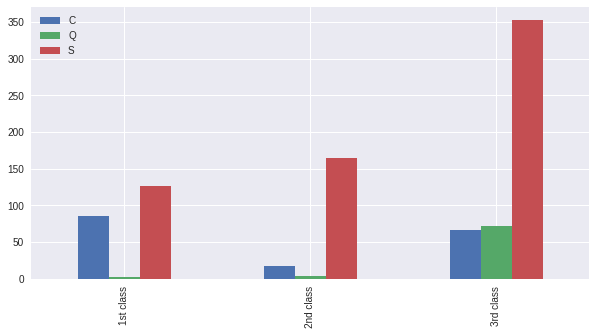

In [201]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()

df = pd.DataFrame([Pclass1, Pclass2, Pclass3]) #pandas dataFrame 만들기
df.index = ['1st class', '2nd class', '3rd class'] #각 이름 지어주기
df.plot(kind='bar', stacked=False, figsize=(10,5)) #bar형태로 제작

"""
kind : str

‘line’ : line plot (default)
‘bar’ : vertical bar plot
‘barh’ : horizontal bar plot
‘hist’ : histogram
‘box’ : boxplot
‘kde’ : Kernel Density Estimation plot
‘density’ : same as ‘kde’
‘area’ : area plot
‘pie’ : pie plot
‘scatter’ : scatter plot
‘hexbin’ : hexbin plot
"""

In [202]:
df.describe()

,C,Q,S
count,3.00000,3.000000,3.000000
mean,56.00000,25.666667,214.666667
std,35.08561,40.128959,121.220185
min,17.00000,2.000000,127.000000
25%,41.50000,2.500000,145.500000
50%,66.00000,3.000000,164.000000
75%,75.50000,37.500000,258.500000
max,85.00000,72.000000,353.000000


In [0]:
for dataset in train_test_data:
  dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [204]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


In [0]:
embarked_mapping = {"S":0, "C":1, "Q":2}
for dataset in train_test_data:
  dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [206]:
train.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0


### 2.5 Fare

In [207]:
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

In [0]:
for dataset in train_test_data:
  dataset["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)

In [209]:
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
dtype: int64

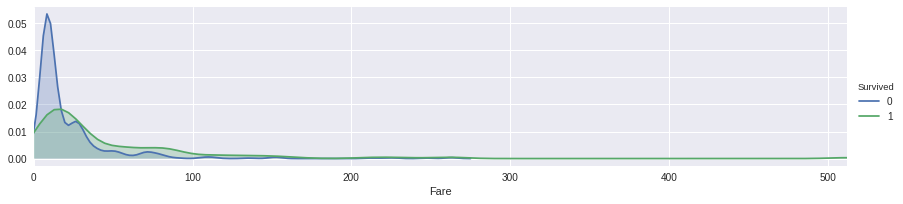

In [210]:
facetGrid("Fare")

(0, 30)

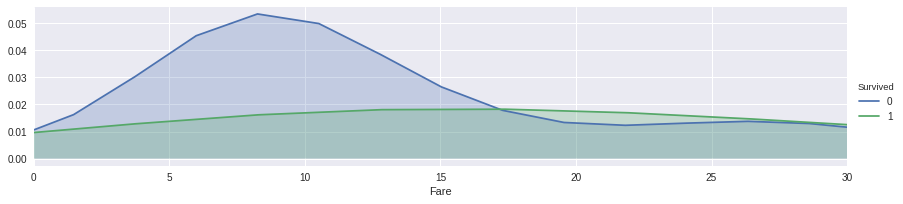

In [211]:
facetGrid("Fare")
plt.xlim(0,30)

(30, 60)

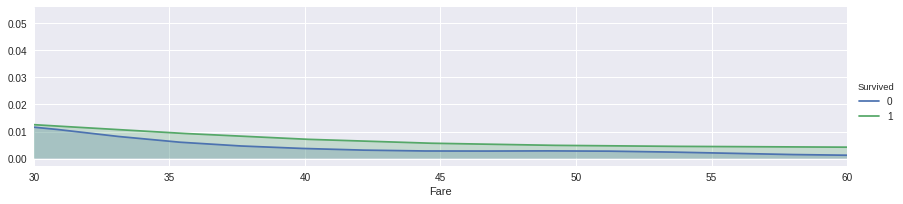

In [212]:
facetGrid("Fare")
plt.xlim(30,60)

(60, 512.3292)

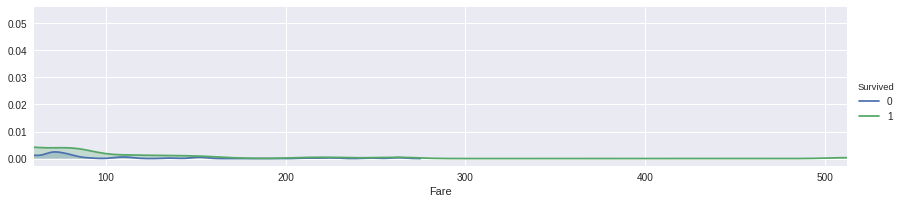

In [213]:
facetGrid("Fare")
plt.xlim(60)

In [214]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0


In [0]:
#Binning
for dataset in train_test_data:
  dataset.loc[(dataset['Fare'] <= 17), 'Fare'] = 0
  dataset.loc[(dataset['Fare']>17) & (dataset['Fare']<=30), 'Fare'] = 1
  dataset.loc[(dataset['Fare']>30) & (dataset['Fare']<=100), 'Fare'] = 2
  dataset.loc[dataset['Fare']>100, 'Fare'] = 3

In [216]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


### 2.6 Cabin
객실이라고 생각하면 될 듯

In [0]:
train.Cabin.value_counts()

In [0]:
for dataset in train_test_data:
  dataset['Cabin'] = dataset['Cabin'].str[:1]

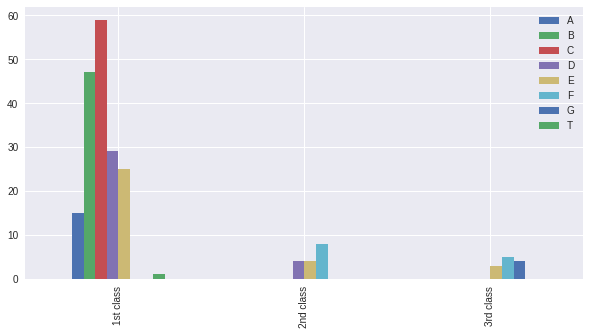

In [219]:
#탑승객 등급별 객실번호 분석 - ABCT는 1등급만, D는 2등급만, E는 모두, F는 2,3등급, G는 3등급
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=False, figsize=(10,5))

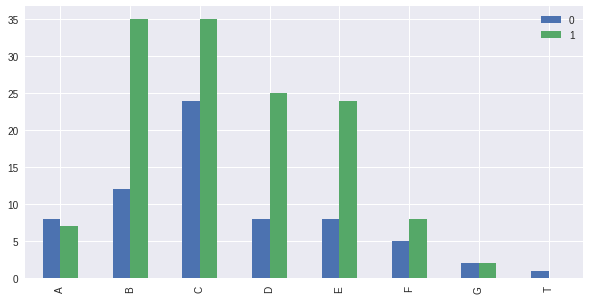

In [220]:
#각 객실번호에 따라 살아남은 사람들 분석 - 살아남은비율이 BDE는 3배수, CF는 1.5배수, AG는 1배수, T는 0
Pclass1 = train[train['Cabin']=='A']['Survived'].value_counts()
Pclass2 = train[train['Cabin']=='B']['Survived'].value_counts()
Pclass3 = train[train['Cabin']=='C']['Survived'].value_counts()
Pclass4 = train[train['Cabin']=='D']['Survived'].value_counts()
Pclass5 = train[train['Cabin']=='E']['Survived'].value_counts()
Pclass6 = train[train['Cabin']=='F']['Survived'].value_counts()
Pclass7 = train[train['Cabin']=='G']['Survived'].value_counts()
Pclass8 = train[train['Cabin']=='T']['Survived'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3, Pclass4, Pclass5, Pclass6, Pclass7, Pclass8])
df.index = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']
df.plot(kind='bar', stacked=False, figsize=(10,5))

In [0]:
#feature scaling
cabin_mapping={"B":3, "D":3, "E":3, "C":1.5,"F":1.5,"A":0.85,"G":1,"T":0}
for dataset in train_test_data:
  dataset['Cabin']=dataset['Cabin'].map(cabin_mapping)

In [222]:
#Cabin정보가 없는 경우가 많기 때문에 이는 위에서 분석한 등급별 중앙값으로 한다.
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
dtype: int64

In [223]:
for dataset in train_test_data:
  dataset['Cabin'].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,1.50,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,1.50,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,1.50,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,1.50,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,1.50,0,0
5,6,0,3,0,2.0,0,0,330877,0.0,1.50,2,0
6,7,0,1,0,3.0,0,0,17463,2.0,3.00,0,0
7,8,0,3,0,0.0,3,1,349909,1.0,1.50,0,3
8,9,1,3,1,2.0,0,2,347742,0.0,1.50,0,2
9,10,1,2,1,0.0,1,0,237736,2.0,2.25,1,2


### 2.7 FamilySize

In [0]:
#FAimlySize Feature를 추가해줌
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

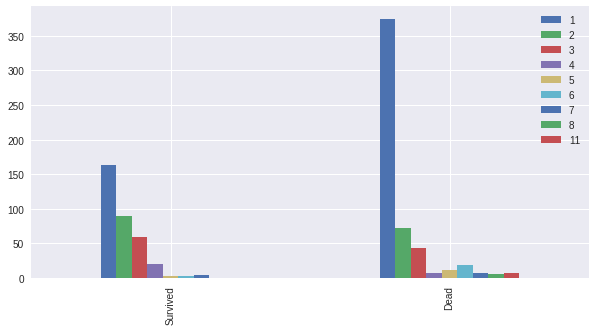

In [225]:
bar_chart("FamilySize",False)

In [0]:
family_mapping = {1:0.5, 2:1.3, 3:1.3, 4:3, 5:0.3, 6:0.1, 7:0.5, 8:0, 11:0}
for dataset in train_test_data:
  dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [227]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,1.5,0,0,1.3
1,2,1,1,1,3.0,1,0,PC 17599,2.0,1.5,1,2,1.3
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,1.5,0,1,0.5
3,4,1,1,1,2.0,1,0,113803,2.0,1.5,0,2,1.3
4,5,0,3,0,2.0,0,0,373450,0.0,1.5,0,0,0.5


### 3. Modeling

#### 3.1 Data drop and NaN check
Nan check tip!

pd.isnull(train_data).sum() > 0

In [0]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1) #열데이터를 드랍하기때문에 axis도 고려를 꼭 해줘야함
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1) #train학습데이터에서는 PassengerId가 불필요하니까 드랍!

In [229]:
train_data = train.drop('Survived', axis=1) #X데이터가 되는거쥬
target = train['Survived'] #Y데이터가 되는 거쥬

train_data.shape, target.shape #8개의 feature를 가지는 X데이터와 1개의 데이터를 가지는 target데이터

((891, 8), (891,))

In [230]:
train_data.head(5)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,1.5,0,0,1.3
1,1,1,3.0,2.0,1.5,1,2,1.3
2,3,1,1.0,0.0,1.5,0,1,0.5
3,1,1,2.0,2.0,1.5,0,2,1.3
4,3,0,2.0,0.0,1.5,0,0,0.5


In [231]:
type(target)

pandas.core.series.Series

In [232]:
type(train_data)

pandas.core.frame.DataFrame

In [233]:
"""
submission = pd.DataFrame({
        "Pclass": test["Pclass"],
        "Sex": test["Sex"],
        "Age": test["Age"],
        "Fare": test["Fare"],
        "Cabin": test["Cabin"],
        "Embarked": test["Embarked"],
        "Title": test["Title"],
        "FamilySize": test["FamilySize"]
    })

submission.to_csv('submission.csv', index=False)
"""

'\nsubmission = pd.DataFrame({\n        "Pclass": test["Pclass"],\n        "Sex": test["Sex"],\n        "Age": test["Age"],\n        "Fare": test["Fare"],\n        "Cabin": test["Cabin"],\n        "Embarked": test["Embarked"],\n        "Title": test["Title"],\n        "FamilySize": test["FamilySize"]\n    })\n\nsubmission.to_csv(\'submission.csv\', index=False)\n'

#### 3.2 Sklearn import

In [0]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [235]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
Fare          891 non-null float64
Cabin         891 non-null float64
Embarked      891 non-null int64
Title         891 non-null int64
FamilySize    891 non-null float64
dtypes: float64(4), int64(5)
memory usage: 62.7 KB


#### 3.3 Cross Validation(K-fold)
테스트를 할 수 없기때문에 Validation을 하는데 Train데이터를 여러개로 나누어서 각 라운드마다 다른 validation셋을 사용해서 테스트하고 전체 라운드의 평균을 구해서 최종 정확도를 따진다.

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

#### 3.4 kNN

In [237]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.8        0.74157303 0.80898876 0.80898876 0.87640449 0.80898876
 0.83146067 0.82022472 0.79775281 0.83146067]


In [238]:
round(np.mean(score)*100,2)

81.26

#### 3.5 Decision Tree

In [239]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.78888889 0.80898876 0.83146067 0.75280899 0.82022472 0.7752809
 0.84269663 0.82022472 0.71910112 0.79775281]


In [240]:
round(np.mean(score)*100, 2)

79.57

#### 3.6 Random Forest

In [241]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82222222 0.82022472 0.80898876 0.70786517 0.85393258 0.79775281
 0.79775281 0.80898876 0.75280899 0.83146067]


In [242]:
round(np.mean(score)*100, 2)

80.02

#### 3.7 Naive Bayes

In [243]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.75555556 0.7752809  0.75280899 0.68539326 0.71910112 0.82022472
 0.74157303 0.74157303 0.79775281 0.80898876]


In [244]:
round(np.mean(score)*100, 2)

75.98

#### 3.8 SVM

In [0]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

In [246]:
round(np.mean(score)*100,2)

82.38

###4. Testing

In [247]:
clf = SVC()
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [0]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)

In [249]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
